In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv(r'C:\Users\Milan\Downloads\penguins_size.csv')

In [5]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [6]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
339    False
340    False
341    False
342    False
343    False
Length: 344, dtype: bool

In [10]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [11]:
df = df.dropna()

In [12]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [13]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [14]:
from sklearn import tree

In [15]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [16]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [17]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [18]:
df[df['species']== 'Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [19]:
df.at[336,'sex']='FEMALE'

In [20]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [21]:
df['sex']=df['sex'].map({'MALE':0,'FEMALE':1})

C:\Users\Milan\AppData\Local\Temp\ipykernel_8080\2237730655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex']=df['sex'].map({'MALE':0,'FEMALE':1})


In [22]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1


In [23]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [24]:
df['species']=df['species'].map({'Adelie':0, 'Chinstrap':1, 'Gentoo':2})

C:\Users\Milan\AppData\Local\Temp\ipykernel_8080\3734058219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species']=df['species'].map({'Adelie':0, 'Chinstrap':1, 'Gentoo':2})


In [25]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,0
1,0,Torgersen,39.5,17.4,186.0,3800.0,1
2,0,Torgersen,40.3,18.0,195.0,3250.0,1
4,0,Torgersen,36.7,19.3,193.0,3450.0,1
5,0,Torgersen,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,2,Biscoe,47.2,13.7,214.0,4925.0,1
340,2,Biscoe,46.8,14.3,215.0,4850.0,1
341,2,Biscoe,50.4,15.7,222.0,5750.0,0
342,2,Biscoe,45.2,14.8,212.0,5200.0,1


In [26]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [27]:
df['island']=df['island'].map({'Torgersen':0, 'Biscoe':1, 'Dream':2})

C:\Users\Milan\AppData\Local\Temp\ipykernel_8080\1695381034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['island']=df['island'].map({'Torgersen':0, 'Biscoe':1, 'Dream':2})


In [28]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,0
1,0,0,39.5,17.4,186.0,3800.0,1
2,0,0,40.3,18.0,195.0,3250.0,1
4,0,0,36.7,19.3,193.0,3450.0,1
5,0,0,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,2,1,47.2,13.7,214.0,4925.0,1
340,2,1,46.8,14.3,215.0,4850.0,1
341,2,1,50.4,15.7,222.0,5750.0,0
342,2,1,45.2,14.8,212.0,5200.0,1


In [29]:
x= df.drop('species',axis=1)
y= df['species']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [32]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth' : [2,4,6,8,10,12],
         'min_samples_split' : [2,3,4],
         'min_samples_leaf':[1,2]}
clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator = clf, param_grid = params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [33]:
gcv.best_params_

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [34]:
y_pred = gcv.predict(X_test)
y_pred

array([2, 1, 2, 0, 2, 0, 1, 0, 2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1,
       2, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0,
       2], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, confusion_matrix

In [36]:
gcv.score(X_test, y_test)

0.9701492537313433

In [37]:
gcv.score(X_train, y_train)

1.0

In [38]:
accuracy_score(y_test, y_pred)

0.9701492537313433

In [39]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(df.iloc[:,:-1],df.iloc[:,-1])

DecisionTreeClassifier(criterion='entropy')

[Text(0.475, 0.96875, 'X[5] <= 3712.5\nentropy = 1.0\nsamples = 334\nvalue = [168, 166]'),
 Text(0.25, 0.90625, 'X[3] <= 18.55\nentropy = 0.673\nsamples = 113\nvalue = [20, 93]'),
 Text(0.06666666666666667, 0.84375, 'X[2] <= 40.55\nentropy = 0.164\nsamples = 83\nvalue = [2, 81]'),
 Text(0.03333333333333333, 0.78125, 'entropy = 0.0\nsamples = 53\nvalue = [0, 53]'),
 Text(0.1, 0.78125, 'X[2] <= 40.75\nentropy = 0.353\nsamples = 30\nvalue = [2, 28]'),
 Text(0.06666666666666667, 0.71875, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.13333333333333333, 0.71875, 'X[2] <= 48.3\nentropy = 0.216\nsamples = 29\nvalue = [1, 28]'),
 Text(0.1, 0.65625, 'entropy = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(0.16666666666666666, 0.65625, 'X[2] <= 49.15\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(0.13333333333333333, 0.59375, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2, 0.59375, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.43333333333333335, 0.84375, 'X[2] <= 

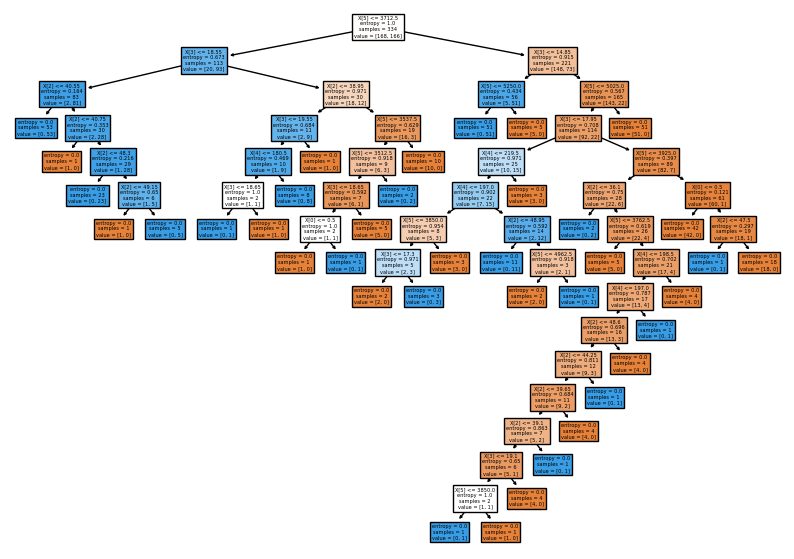

In [40]:
from sklearn import tree
plt.figure(figsize=(10,7))
tree.plot_tree(classifier,filled = True)

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
X = pd.get_dummies(df.drop('species', axis =1), drop_first = True)

In [43]:
y = df['species']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
forest = RandomForestClassifier(n_estimators = 10, max_features = 'auto', random_state =101) 

In [48]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [49]:
preds = forest.predict(X_test)

In [50]:
from sklearn.metrics import classification_report, plot_confusion_matrix

C:\Users\Milan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


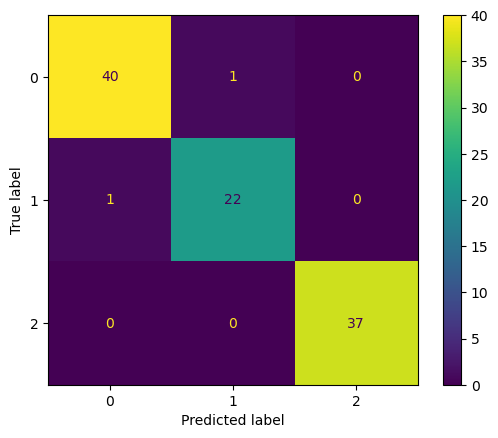

In [51]:
plot_confusion_matrix(forest, X_test, y_test)

In [55]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.96      0.96      0.96        23
           2       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



In [56]:
forest.score(X_train, y_train)

1.0

In [57]:
forest.score(X_test, y_test)

0.9801980198019802